# Carga de datos

## Librerias

In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Constantes

In [2]:
SAVE_DATAFRAME = False
SAVE_FIG = False

PATH_MAIN = path.join("..")
PATH_DATA = path.join(PATH_MAIN, "datos")

PATH_FAKE = path.join(PATH_DATA, "Fake.csv")
PATH_TRUE = path.join(PATH_DATA, "True.csv")

## Carga del dataframe

In [3]:
df_fake = pd.read_csv(PATH_FAKE)
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true = pd.read_csv(PATH_TRUE)
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Solo basta un dataframe pues comparten el nombre de las columnas
columnas = list(df_true.columns)
columnas

['title', 'text', 'subject', 'date']

## Información de los datasets

### Información de los datasets

Visualizar la información de las filas de los datasets.

In [7]:
df_fake.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
df_true.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


Las fechas se encuentran en formato string, como por ejemplo: 'December 31, 2017'. Por lo tanto se procederá a transformarlas a Timestamp.

In [8]:
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :Param string: str, string to check for date
    :Param fuzzy: bool, ignore unknown tokens in string if True
    """
    from dateutil.parser import parse
    
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [9]:
# pd.Timestamp(df_fake["date"])
nat = np.datetime64('NaT')
df_fake["date"] = df_fake["date"].apply(lambda x: pd.Timestamp(x) if is_date(x) else nat)
df_true["date"] = df_true["date"].apply(lambda x: pd.Timestamp(x) if is_date(x) else nat)

In [81]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25


In [82]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


In [69]:
df_fake['date'].describe()

count                   23471
unique                   1010
top       2016-02-16 00:00:00
freq                       53
first     2015-03-31 00:00:00
last      2018-02-19 00:00:00
Name: date, dtype: object

In [70]:
df_true['date'].describe()

count                   21417
unique                    716
top       2017-12-20 00:00:00
freq                      182
first     2016-01-13 00:00:00
last      2017-12-31 00:00:00
Name: date, dtype: object

### Observar si existen datos nulos

Ver cuantos elementos nulos existen en el dataset.

In [69]:
df_fake.isna().sum()

title       0
text        0
subject     0
date       10
dtype: int64

In [71]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Se concluye que en la data de las noticias falsas hay 10 filas con fecha nula. Mientras que en la data de noticias verdaderas no hay nulos. Se eliminarán las filas con elementos nulos. 

In [77]:
df_fake.dropna(inplace=True)

### Variables únicas

En principio, la columna `'title'` y `'text'` no son ni númericas, ni categóricas. `'date'` es un tipo de variable temporal, mientras que `'subject'` es una variable categórica. 

Veamos cuantas variables categóricas diferentes hay para cada `DataFrame`.

In [22]:
pd.unique(df_true["subject"])

array(['politicsNews', 'worldnews'], dtype=object)

In [24]:
pd.unique(df_fake["subject"])

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

¿A qué se refiere `'worldnews'`? Obtengamos una noticia de esta categoría para observarlo:

In [31]:
df_true[df_true["subject"] == "worldnews"]["text"][11272]

'YANGON (Reuters) - Two Reuters journalists who have been detained in Myanmar for the past two weeks were remanded in custody for a further two weeks on Wednesday as a probe continues into allegations they breached the nation s Official Secrets Act. Judge Ohn Myint granted the 14-day extension in the case of the journalists, Wa Lone, 31, and Kyaw Soe Oo, 27, at the request of the police, who then took them to Yangon s Insein prison. They were previously being held in a police compound. When they appeared at the Mingaladon court for the proceedings, Wa Lone and Kyaw Soe Oo were allowed to meet their families and their lawyer for the first time since their arrest. The two journalists had worked on Reuters coverage of a crisis in the western state of Rakhine, where - according to United Nations  estimates - about 655,000 Rohingya Muslims have fled from a fierce military crackdown on militants. They were detained on Dec 12 after they had been invited to meet police officials over dinner. T

Podemos decir entonces que una noticia de `'worldnews'` es una noticia referida a un país distinto a EEUU.

Se concluye que no será posible utilizar la categoría 'subject' en las predicciones, puesto que en ambos datasets las categorías son distintas, por lo que no sería un dato comparable. 

## EDA

### Análisis gráfico del tiempo

A continuación se presentan gráficos sobre la distribución de las noticias según distintos criterios temporales. 

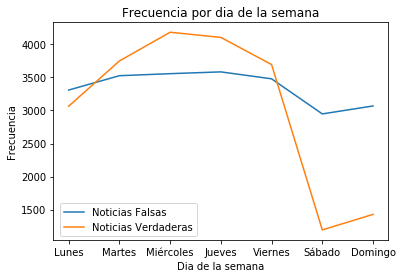

In [44]:
ts_f = df_fake["date"].apply(lambda x: x.dayofweek).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].apply(lambda x: x.dayofweek).value_counts().reset_index().sort_values(by= ['index'])

dict_week= {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo' }
ts_f['index']= ts_f['index'].map(dict_week)
ts_t['index']= ts_t['index'].map(dict_week)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'], label= 'Noticias Falsas')  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'], label= 'Noticias Verdaderas')
fig.legend(loc=[0.15, 0.15] )

ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia por dia de la semana')

plt.show()

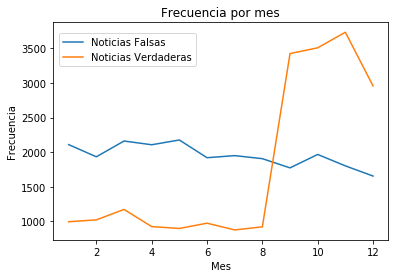

In [61]:
ts_f = df_fake["date"].apply(lambda x: x.month).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].apply(lambda x: x.month).value_counts().reset_index().sort_values(by= ['index'])

dict_meses= { 1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
             9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
# Si se quiere mostrar los meses por su nombre
#ts_f['index']= ts_f['index'].map(dict_meses)
#ts_t['index']= ts_t['index'].map(dict_meses)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'], label= 'Noticias Falsas')  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'], label= 'Noticias Verdaderas')

ax.set_xlabel('Mes')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia por mes')

fig.legend(loc=[0.15,0.76]) 

plt.show()

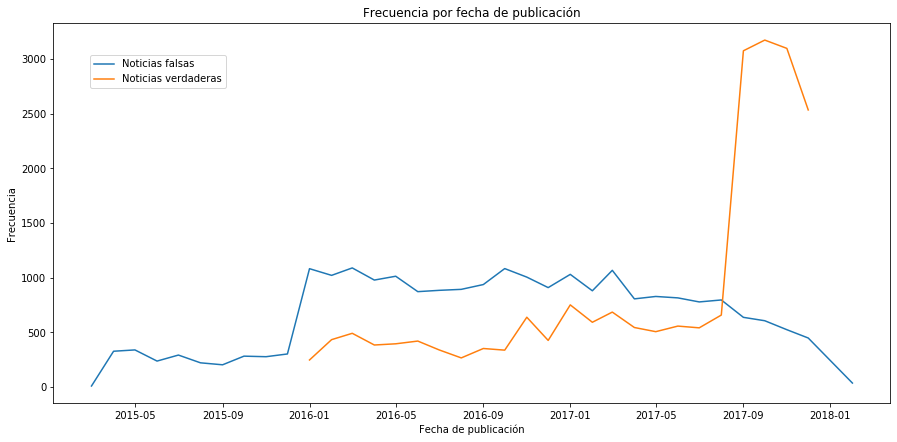

In [65]:
ts_f = df_fake["date"].dropna().apply(lambda x: pd.Timestamp(x.strftime("%Y-%m"))).value_counts().reset_index().sort_values(by= ['index'])
ts_t = df_true["date"].dropna().apply(lambda x: pd.Timestamp(x.strftime("%Y-%m"))).value_counts().reset_index().sort_values(by= ['index'])

fig, ax = plt.subplots(figsize= (15,7))  # Create a figure containing a single axes.
ax.plot(ts_f['index'], ts_f['date'], label= 'Noticias falsas')  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'], label= 'Noticias verdaderas')
fig.legend(loc= [0.1, 0.8]) 

ax.set_xlabel('Fecha de publicación')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia por fecha de publicación')

plt
plt.show()

# Wordclouds 

## Librerias

In [75]:
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

In [67]:
def show_wordcloud(data, title = None):
    """
    Retorna la visualización de la nube de palabras.

    :Parametro data: str, string con el texto a graficar.
    :Parametro title: str, titulo del grafico. 
    """
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [68]:
# Variables de los nombres de las columnas

TITLE = 'title'
TEXT= 'text'
SUBJECT = 'subject'
DATE = 'date'

In [86]:
# Texto noticias falsas
FAKE_TEXT = []
for i in df_fake.index:
    FAKE_TEXT.append(df_fake[TEXT][i])

# Texto noticias verdaderas
TRUE_TEXT = []
for i in df_true.index:
    TRUE_TEXT.append(df_true[TEXT][i])

Ahora vamos a 'lemmanizar' las oraciones. (Ref: Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.)

In [87]:
# Texto noticias falsas lemmatizado
FAKE_TEXT_lemm = []
for i in FAKE_TEXT:
    FAKE_TEXT_lemm.append(lem.lemmatize(i))

# Texto noticias verdaderas lemmatizado
TRUE_TEXT_lemm = []
for i in TRUE_TEXT:
    TRUE_TEXT_lemm.append(lem.lemmatize(i))

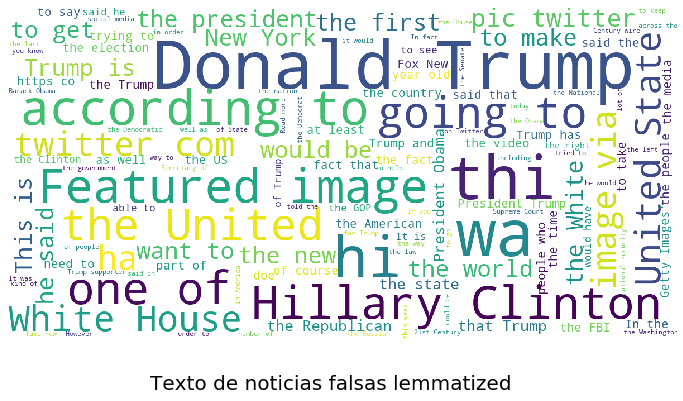

In [79]:
show_wordcloud(FAKE_TEXT_lemm, title= 'Texto de noticias falsas lemmatized')

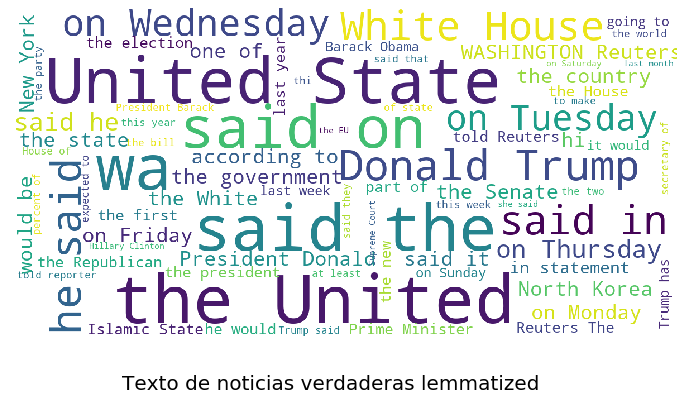

In [80]:
show_wordcloud(TRUE_TEXT_lemm, title= 'Texto de noticias verdaderas lemmatized')

Notemos que en las noticias falsas, los textos tienen una gran presencia de modismos, como: 'hi', 'thi', 'wa', 'ha', etc.

In [132]:
# Titulo noticias falsas
FAKE_TITLE = []
for i in df_fake.index:
    FAKE_TITLE += word_tokenize(df_fake[TITLE][i])

# Titulo noticias verdaderas
TRUE_TITLE = []
for i in df_true.index:
    TRUE_TITLE += word_tokenize(df_true[TITLE][i])
    
# Titulo noticias falsas stematizado
FAKE_TITLE_stem = []
for i in FAKE_TITLE:
    FAKE_TITLE_stem.append(stem.stem(i))
    
# Texto noticias verdaderas stematizado
TRUE_TITLE_stem = []
for i in TRUE_TITLE:
    TRUE_TITLE_stem.append(stem.stem(i))
       

In [ ]:
show_wordcloud(FAKE_TITLE_lemm, title= 'Título de noticias falsas stemmed')

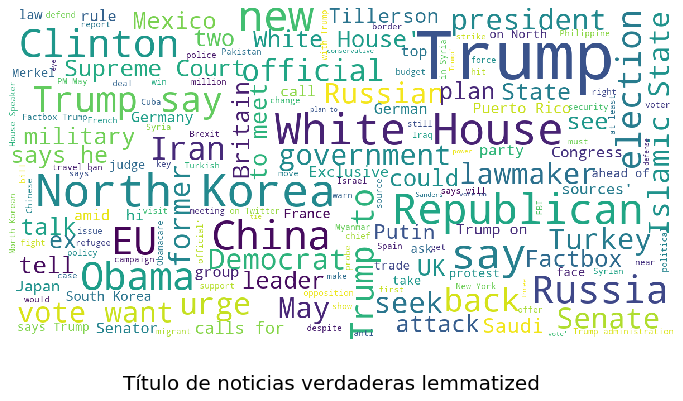

In [92]:
show_wordcloud(TRUE_TITLE_lemm, title= 'Título de noticias verdaderas stemmed')

In [133]:
FAKE_TITLE_stem[:20]

['donald',
 'trump',
 'send',
 'out',
 'embarrass',
 'new',
 'year',
 '’',
 's',
 'eve',
 'messag',
 ';',
 'thi',
 'is',
 'disturb',
 'drunk',
 'brag',
 'trump',
 'staffer',
 'start']

'’'

In [101]:
FAKE_TITLE[:20]

[' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing',
 ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation',
 ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’',
 ' Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)',
 ' Pope Francis Just Called Out Donald Trump During His Christmas Speech',
 ' Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES)',
 ' Fresh Off The Golf Course, Trump Lashes Out At FBI Deputy Director And James Comey',
 ' Trump Said Some INSANELY Racist Stuff Inside The Oval Office, And Witnesses Back It Up',
 ' Former CIA Director Slams Trump Over UN Bullying, Openly Suggests He’s Acting Like A Dictator (TWEET)',
 ' WATCH: Brand-New Pro-Trump Ad Features So Much A** Kissing It Will Make You Sick',
 ' Papa John’s Founder Retires, Figures Out Racism Is Bad For Business',
 ' WATCH: Paul Ryan Just Told Us He Doesn’t Care About S

In [102]:
TRUE_TITLE[:20]

['As U.S. budget fight looms, Republicans flip their fiscal script',
 'U.S. military to accept transgender recruits on Monday: Pentagon',
 "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'",
 'FBI Russia probe helped by Australian diplomat tip-off: NYT',
 "Trump wants Postal Service to charge 'much more' for Amazon shipments",
 'White House, Congress prepare for talks on spending, immigration',
 'Trump says Russia probe will be fair, but timeline unclear: NYT',
 'Factbox: Trump on Twitter (Dec 29) - Approval rating, Amazon',
 'Trump on Twitter (Dec 28) - Global Warming',
 'Alabama official to certify Senator-elect Jones today despite challenge: CNN',
 'Jones certified U.S. Senate winner despite Moore challenge',
 'New York governor questions the constitutionality of federal tax overhaul',
 'Factbox: Trump on Twitter (Dec 28) - Vanity Fair, Hillary Clinton',
 'Trump on Twitter (Dec 27) - Trump, Iraq, Syria',
 'Man says he delivered manure to Mnuchin to protest new U.S. tax l

In [104]:
FAKE_TITLE_lemm_stem[:20]

[' donald trump sends out embarrassing new year’s eve message; this is disturb',
 ' drunk bragging trump staffer started russian collusion investig',
 ' sheriff david clarke becomes an internet joke for threatening to poke people ‘in the eye’',
 ' trump is so obsessed he even has obama’s name coded into his website (images)',
 ' pope francis just called out donald trump during his christmas speech',
 ' racist alabama cops brutalize black boy while he is in handcuffs (graphic images)',
 ' fresh off the golf course, trump lashes out at fbi deputy director and james comey',
 ' trump said some insanely racist stuff inside the oval office, and witnesses back it up',
 ' former cia director slams trump over un bullying, openly suggests he’s acting like a dictator (tweet)',
 ' watch: brand-new pro-trump ad features so much a** kissing it will make you sick',
 ' papa john’s founder retires, figures out racism is bad for busi',
 ' watch: paul ryan just told us he doesn’t care about struggling fa

In [106]:
FAKE_TITLE_lemm_stem[:20]

[' donald trump sends out embarrassing new year’s eve message; this is disturb',
 ' drunk bragging trump staffer started russian collusion investig',
 ' sheriff david clarke becomes an internet joke for threatening to poke people ‘in the eye’',
 ' trump is so obsessed he even has obama’s name coded into his website (images)',
 ' pope francis just called out donald trump during his christmas speech',
 ' racist alabama cops brutalize black boy while he is in handcuffs (graphic images)',
 ' fresh off the golf course, trump lashes out at fbi deputy director and james comey',
 ' trump said some insanely racist stuff inside the oval office, and witnesses back it up',
 ' former cia director slams trump over un bullying, openly suggests he’s acting like a dictator (tweet)',
 ' watch: brand-new pro-trump ad features so much a** kissing it will make you sick',
 ' papa john’s founder retires, figures out racism is bad for busi',
 ' watch: paul ryan just told us he doesn’t care about struggling fa

In [110]:
lem.lemmatize('called', 'v')

'call'

In [119]:
stem.stem(word_tokenize(df_fake[TITLE][6]))

AttributeError: 'list' object has no attribute 'lower'